# Airbnb New User Bookings
## 1.数据处理

### 1.1导入数据
语句简要说明：首先将必用包导入。

**%matplotlib inline** 表示将绘制出的表格嵌入到notebook中。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
%matplotlib inline
import datetime
import os
import seaborn as sns#数据可视化
from datetime import date
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
import pickle #用于存储模型
import seaborn as sns
from sklearn.metrics import *
from sklearn.model_selection import *

使用pd.read_csv()将训练集以及测试集数据导入读取。并存储在train与test中。

In [2]:
train = pd.read_csv("./Data/train_users_2.csv")
test = pd.read_csv("./Data/test_users.csv")

### 1.2数据分析——train，test文件
读取了数据集之后，分别打印出两个数据集中所包含的特征。运行之后可以看到，
training数据集与test数据集中的数据大致相同。而trainingt比test数据集中多了
“country_destination”特征，是需要预测的目标变量。因此在我们进行数据分析处理时
着重分析train文件

In [3]:
print('the columns name of training dataset:\n',train.columns)
print('the columns name of test dataset:\n',test.columns)

the columns name of training dataset:
 Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')
the columns name of test dataset:
 Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser'],
      dtype='object')


在得知数据集所有特征之后，我们选择train文件进行分析。通过info（）方法将数据集的简要信息打印出来。

运行之后我们可以得知：

train文件包含213451条数据，16个特征。并且date_first_booking和first_affiliate_tracked存在多个空值。

在运算计算过程中，对于这两个特征应该小心考虑
并且，由于date_first_booking空值较多。在特征提取时，可以考虑是否要进行删除。
 
---

**所使用方法说明：**

**DataFrame.info()————pandas**

**用于对某个数据集的简要统计说明。**

In [4]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB
None


#### 1.2.1 date_account_created
通过info（）方法得知数据集的特征之后，我们开始对所有特征进行逐个分析。因为id是用户的标记名称，作为分析的意义不大。因此我们可以略过，直接分析date_account_created特征。首先使用describe()方法查看date_account_created特征的概要信息。我们通过输出可以看出以下信息：

date_account_created总共有213451条数据，

不重复日期有1634天，

最近一次日期为2014-05-13 等……

---


**所使用方法说明：**

**DataFrame.describe()————pandas**

**describe()函数自动计算的字段有count（非空值数）、unique（唯一值数）、top（频数最高者）、freq（最高频数量）**

In [5]:
print(train.date_account_created.describe())

count         213451
unique          1634
top       2014-05-13
freq             674
Name: date_account_created, dtype: object


分析了大致情况之后，我们可以通过数据可视化处理，将**date_account_created**中的数据分析并以图像展示。

我们可以通过下面的图标发现，用户的增长量是与日期成正比的。


---

**所使用方法说明：**

**1.pandas.Series.value_counts()**

**value_counts()是一种查看表格某列中有多少个不同值的快捷方法，并计算每个不同值有在该列中有多少重复值。默认为递减排序**

**输出为Series，是一个一维数组，第一列作为series的index索引**

**2.pandas.index**

**网络上对于index的用法讲述并不明确，这里我认为在这里index的用途是将series的索引取出。**

**3.panda.to_datetime()**

**将Str和Unicode转化为时间格式**
**4.matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, \*, data=None, \*\*kwargs)**

**用来绘制绘制散点图。**

 |参数|意义|
 |----|----|
 |x|x轴的变量|
 |y|y轴的变量|
 |s|形状大小|
 |c|颜色| 


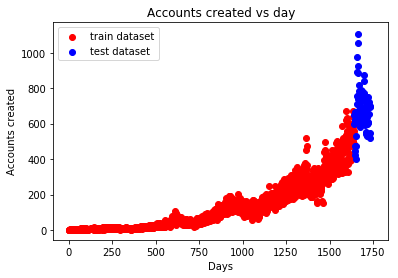

In [6]:
#计算train训练集和test训练集中date_account_created的唯一值及其频率次数
dac_train = train.date_account_created.value_counts()
dac_test = test.date_account_created.value_counts()
#将统计后的所有日期由字符串格式转换为统一的日期格式
dac_train_date = pd.to_datetime(train.date_account_created.value_counts().index)
dac_test_date = pd.to_datetime(test.date_account_created.value_counts().index)
#计算日期差距
dac_train_day = dac_train_date - dac_train_date.min()
dac_test_day = dac_test_date - dac_train_date.min()
#将train数据集和test数据集全部显示在图中
plt.scatter(dac_train_day.days,dac_train.values, color = 'r', label = 'train dataset')
plt.scatter(dac_test_day.days,dac_test.values, color = 'b', label = 'test dataset')
#注明点状图的各个名称
plt.title('Accounts created vs day')
plt.xlabel('Days')
plt.ylabel('Accounts created')
plt.legend(loc = 'upper left')

#### 1.2.2 timestamp_first_active 
在分析了上述的特征之后，我们对第二个特征timestamp_first_active 进行分析。

同样我们首先通过describe查看timestamp_first_active 特征的简要统计信息。

In [7]:
print(train.timestamp_first_active.describe())

count    2.134510e+05
mean     2.013085e+13
std      9.253717e+09
min      2.009032e+13
25%      2.012123e+13
50%      2.013091e+13
75%      2.014031e+13
max      2.014063e+13
Name: timestamp_first_active, dtype: float64


上面的统计信息因为记录的字符串过长，被显示为了浮点型数据。我们可以选择查看部分数据。

----

**所用的方法：**

**head()————panda**

**用来查看前几行的数据，（）中输入整型数字n表示查看前n个数据。**

In [8]:
print(train.timestamp_first_active.head())

0    20090319043255
1    20090523174809
2    20090609231247
3    20091031060129
4    20091208061105
Name: timestamp_first_active, dtype: int64


接下来我们查看该特征下的值得频率。我们可以发现得到的频率统计似乎都是1。

为了验证我们的猜想，我们再用value_counts（）统计之后，我们再使用unique()方法来确定是否全部都无重复。

我们可以发现并无重复数据。

----

**所用到的方法：**

**unique（）————pandas**
**用来检测数据中是否存在重复值。**

In [9]:
#print(train.timestamp_first_active.value_counts())
print(train.timestamp_first_active.value_counts().unique())

[1]


因为并不存在重复数据，且数据量过大，对其进行数据可视化的效果可能并不理想，因此先暂放。

但是我们可以看到该特征下的数据并非是正常的日期格式，而是以字符串表示。为了之后分析便捷，我们将数据进行格式转换。

通过切片操作，将年月日时依次切分。并且我们已知timestamp_first_active类型为int64，所以我们如果需要使用切片处理，

最好的方法是先进行格式转换。

----

**所用到的方法**

**1、DataFrame.apply(func, axis=0, broadcast=False, raw=False, reduce=None, args=(), /* /* kwds)——pandas**

**该函数最有用的是第一个参数，这个参数是函数，相当于C/C++的函数指针。**

**这个函数需要自己实现，函数的传入参数根据axis来定，比如axis = 1，就会把一行数据作为Series的数据**

**结构传入给自己实现的函数中，我们在函数中实现对Series不同属性之间的计算，返回一个结果，则apply函数**

**会自动遍历每一行DataFrame的数据，最后将所有结果组合成一个Series数据结构并返回。**

**2.lambda
**lambda argument_list: expression**
**lambda是Python预留的关键字，argument_list和expression由用户自定义。具体介绍如下。这里的argument_list是参数列表。它的结构与Python中函数**

**(function)的参数列表是一样的。具体来说，argument_list可以有非常多的形式。例如：数值，变量，为空等。这里的expression是一个关于参数的表达**

**式。表达式中出现的参数需要在argument_list中有定义，并且表达式只能是单行的。**

**lambda函数有如下特性：**

    * lambda函数是匿名的：所谓匿名函数，通俗地说就是没有名字的函数。lambda函数没有名字。

    * lambda函数有输入和输出：输入是传入到参数列表argument_list的值，输出是根据表达式expression计算得到的值。

    * lambda函数一般功能简单：单行expression决定了lambda函数不可能完成复杂的逻辑，只能完成非常简单的功能。由于其实现的功能一目了然,甚至不需要专门的名字来说明。

**3.astype()————Numpy数组**

**用于数据类型转换，（）中是需要转换成的数据类型。**


In [10]:
tfa_train_dt = train.timestamp_first_active.astype(str).apply(lambda x:  
                                                                    datetime.datetime(int(x[:4]),
                                                                                      int(x[4:6]), 
                                                                                      int(x[6:8]), 
                                                                                      int(x[8:10]), 
                                                                                      int(x[10:12]),
                                                                                      int(x[12:])))
print(tfa_train_dt.describe())

count                  213451
unique                 213451
top       2013-07-01 05:26:34
freq                        1
first     2009-03-19 04:32:55
last      2014-06-30 23:58:24
Name: timestamp_first_active, dtype: object


#### 1.2.3 date_first_booking 
同上文一样，我们先查看数据的简要统计。我们会发现在训练集中，date_first_booking 特征存在大量缺失值。
因此我们再对测试集进行查看。发现测试集中的date_first_booking 特征全部都是缺失值。因此我们对于这项特征，先不考虑。在建模初期可以尝试删除。

In [11]:
print("***********训练集****************")
print(train.date_first_booking.describe())
print("***********测试集****************")
print(test.date_first_booking.describe())

***********训练集****************
count          88908
unique          1976
top       2014-05-22
freq             248
Name: date_first_booking, dtype: object
***********测试集****************
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: date_first_booking, dtype: float64


#### 1.2.4 age
查看age简要统计,但是在查看中我们发现value_counts()统计出来的结果频率重复高，且过于冗长，我们只查看前五个即可。

In [12]:
print(train.age.value_counts().head(5))
print(train.age.describe())

30.0    6124
31.0    6016
29.0    5963
28.0    5939
32.0    5855
Name: age, dtype: int64
count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64


在分析之后，发现age特征的重复频率较高，且分阶段明显，因此我们可以考虑使用柱状图或者饼状图进行数据可视化处理。

经过分析之后我们可以发现，大部分用户的年龄都在正常范围内。并且具有一定数量的缺失值。

----
**所用到的方法：**

**1、shape——numpy**

**shape函数是它的功能是读取矩阵的长度，比如shape\[0\]就是读取矩阵第一维度的长度。直接用.shape可以快速读取矩阵的形状。**

**2.pandas.DataFrame.query（）**
**用来查询满足某项条件的某一列的值。**

**3.matplotlib.pyplot.subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)**

**参数解释：**
    * nrows,ncols:整型，可选参数，默认为1。表示子图网格(grid)的行数与列数
    * sharex,sharey：布尔值或者{'none','all','row','col'}，默认：False。控制x(sharex)或y(sharey)轴之间的属性共享：
                        1.True或者'all'：x或y轴属性将在所有子图(subplots)中共享.
                        2.False或'none'：每个子图的x或y轴都是独立的部分
                        3.'row'：每个子图在一个x或y轴共享行(row)
                        4.'col':每个子图在一个x或y轴共享列(column)
                          当子图在x轴有一个共享列时('col'),只有底部子图的x tick标记是可视的。
                          同理，当子图在y轴有一个共享行时('row'),只有第一列子图的y tick标记是可视的。
    * squeeze：布尔类型，可选参数，默认：True。如果是True，额外的维度从返回的Axes(轴)对象中挤出。
                        》如果只有一个子图被构建(nrows=ncols=1)，结果是单个Axes对象作为标量被返回。
                        》对于N* 1或1* N个子图，返回一个1维数组。
                        》对于N* M，N>1和M>1返回一个2维数组。
                        如果是False，不进行挤压操作：返回一个元素为Axes实例的2维数组，即使它最终是1x1。
    * subplot_kw:字典类型，可选参数。把字典的关键字传递给add_subplot()来创建每个子图。
    * gridspec_kw字典类型，可选参数。把字典的关键字传递给GridSpec构造函数创建子图放在网格里(grid)。
    * * * fig_kw：把所有详细的关键字参数传给figure()函数
    
**4、pie(x,explode=None,labels=None,colors='b','g','r','c','m','y','k','w'),autopct=None,pctdistance=0.6,shadow=False,labeldistance=1.1,st**
**artangle=None, radius=None,counterclock=True,wedgeprops=None,textprops=None,center=（0,0),frame=False )**
    * x：(每一块)的比例，如果sum(x) > 1会使用sum(x)归一化
    * labels：(每一块)饼图外侧显示的说明文字explode (每一块)离开中心距离
    * startangle：起始绘制角度,默认图是从x轴正方向逆时针画起,如设定=90则从y轴正方向画起
    * shadow：是否阴影
    * labeldistance：label绘制位置,相对于半径的比例, 如<1则绘制在饼图内侧
    * autopct：控制饼图内百分比设置,可以使用format字符串或者format function
            '%1.1f'指小数点前后位数(没有用空格补齐)
    * pctdistance 类似于labeldistance,指定autopct的位置刻度
    * radius：控制饼图半径

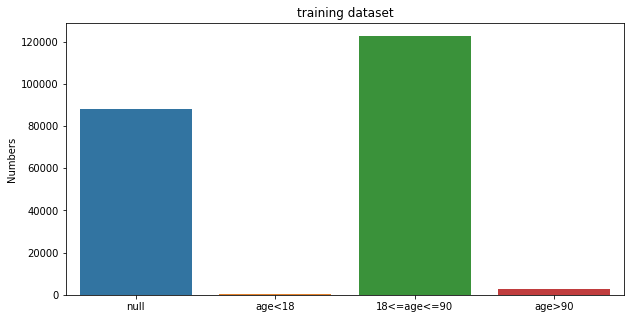

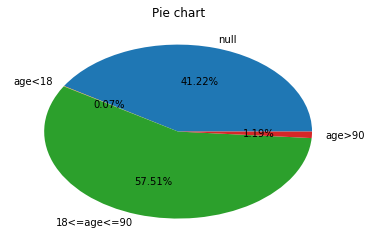

In [13]:
#首先将年龄分组吧，而且因为存在部分空值，因此分组为：null，低龄（0-18），成年人（18-90），高龄（90+）
age_train = [train[train.age.isnull()].age.shape[0],
             train.query('age < 18').age.shape[0],
             train.query('age >= 18 & age <=90').age.shape[0],
             train.query('age>90').age.shape[0]]

#设置分类好的标签
#画树状图
labels = ['null','age<18','18<=age<=90','age>90']
fig,x1 = plt.subplots(sharex=True,sharey=True,figsize=(10,5))
sns.barplot(labels,age_train,ax = x1)
x1.set_title('training dataset')
x1.set_ylabel('Numbers')

#画饼状图
fig2 = plt.figure()
plt.pie(age_train,labels=labels,autopct='%1.2f%%')
plt.title('Pie chart')
plt.show()

通过查看csv源文件数据，我们发现其他特征所包含的labels并不多，因此我们可以尝试在特征分析过程中使用**独热编码（one hot encoding）**即可。

**独热编码（one hot encoding）**

独热编码，又称一位有效编码，其方法是使用N位状态寄存器来对N个状态进行编码，每个状态都有它独立的寄存器位，并且在任意时候，其中只有一位有效。

    * 例如：

        ** 自然状态码为：000  ,  001,   010,   011,  100,  101

        ** 独热编码为  ：000001,000010,000100,001000,010000,100000
 
可以这样理解，对于每一个特征，如果它有m个可能值，那么经过独热编码后，就变成了m个二元特征。并且，这些特征互斥，每次只有一个激活。因此，数据会变成稀疏的。这样做的好处主要有：

    1、解决了分类器不好处理属性数据的问题

    2、在一定程度上也起到了扩充特征的作用
    
同时为了方便，我们定义一个函数用来处理后面的特征。

----
**所用到的方法**

**1、seaborn.barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None,ci=95, n_boot=1000, units=None, orient=None,**

**color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, ax=None, estimator=<function mean>，* * kwargs)**

参数解释：
    * x, y, hue： 设置 x,y轴以及颜色控制的变量
    * data：输入的数据集
    * order, hue_order：控制变量绘图的顺序
    * ax：设置子图位置

**2、

In [14]:
def feature_barplot(feature, df_train = train, figsize=(10,5), rot = 90, saveimg = False): 
    """
    feature:要处理的特征
    df_train:训练集
    figsize:已存在figure对象，通过fig设置尺寸大小。
    rot:
    saveimg:
    """
    #读取训练集该特征的简要数据统计
    feat_train = df_train[feature].value_counts()
    #绘制图片
    fig_feature,axis1 = plt.subplots(figsize = figsize)
    sns.barplot(feat_train.index.values, feat_train.values)
    #用来对x轴上的标记进行优化。因为后面再统计first_browser的时候通过这条语句可以避免图片里各个标签元素名称重叠
    axis1.set_xticklabels(axis1.xaxis.get_majorticklabels(), rotation = rot)
    #对图片进行标注
    axis1.set_title(feature + ' of training dataset')
    axis1.set_ylabel('Numbers')
    
    #图片保存
    if saveimg == True:
        figname = feature + ".png"
        fig_feature.savefig(figname, dpi = 75)

#### 1.2.5 gender
对性别进行分析，发现男性的数量要少量低于女性，且存在大量null值。

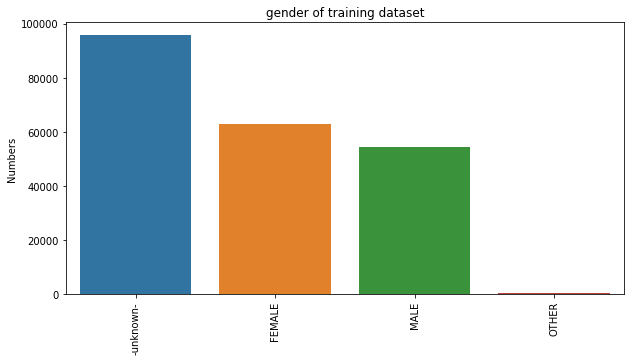

In [15]:
feature_barplot('gender', saveimg = True)

#### 1.2.6 signup_method
注册方式分析

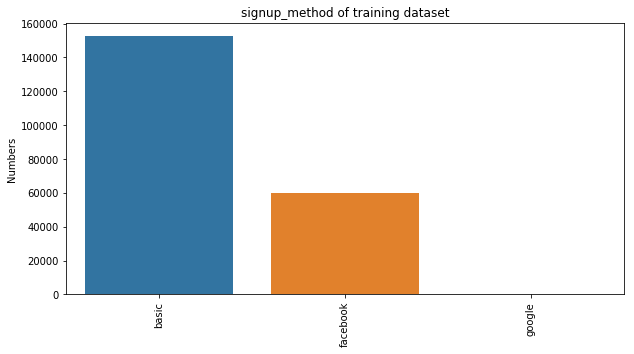

In [16]:
feature_barplot('signup_method')

#### 1.2.7 language
使用语言分析，可以发现大部分都是使用英文，但是我的直观感觉是这个特征的用处不会太大。

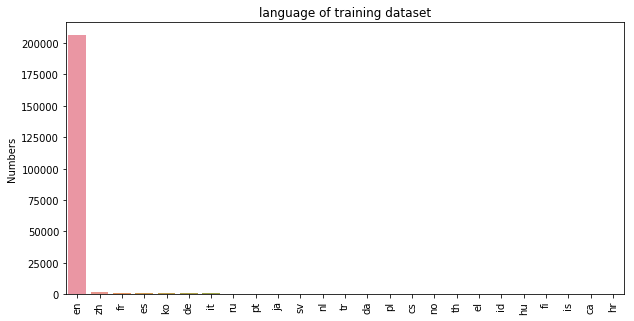

In [17]:
feature_barplot('language')

#### 1.2.8 affiliate_channel

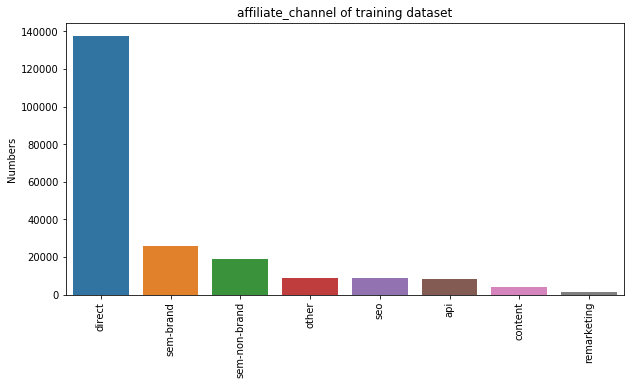

In [18]:
feature_barplot('affiliate_channel')

#### 1.2.9 first_affiliate_tracked

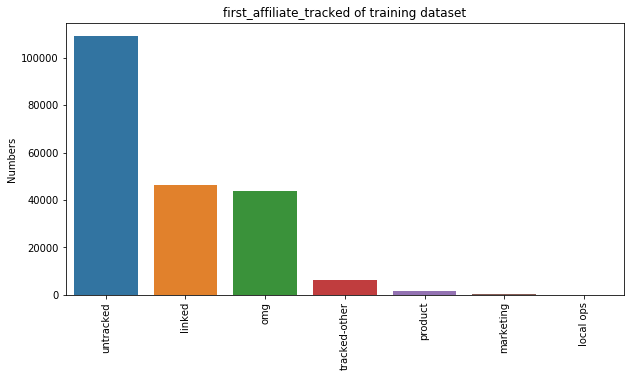

In [19]:
feature_barplot('first_affiliate_tracked')

#### 1.2.10 signup_app

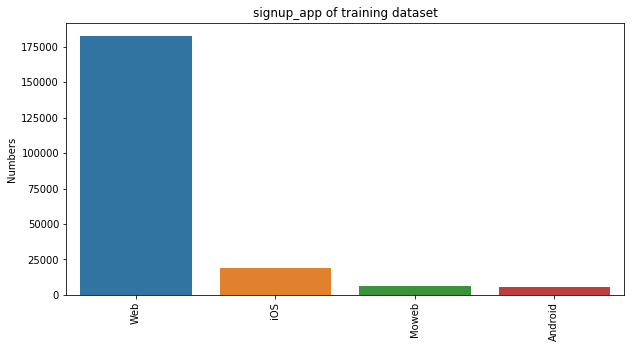

In [20]:
feature_barplot('signup_app')

#### 1.2.11 first_device_type

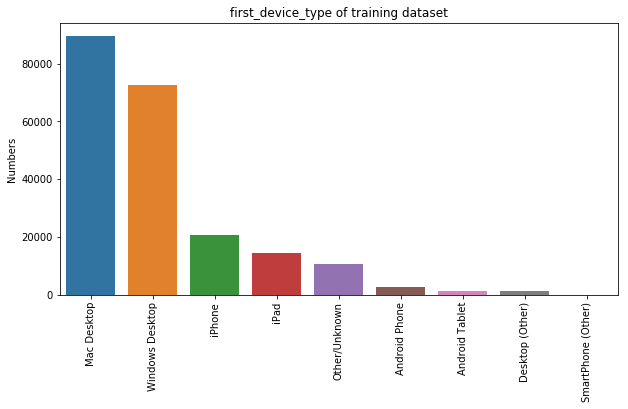

In [21]:
feature_barplot('first_device_type')

#### 1.2.12 first_browser

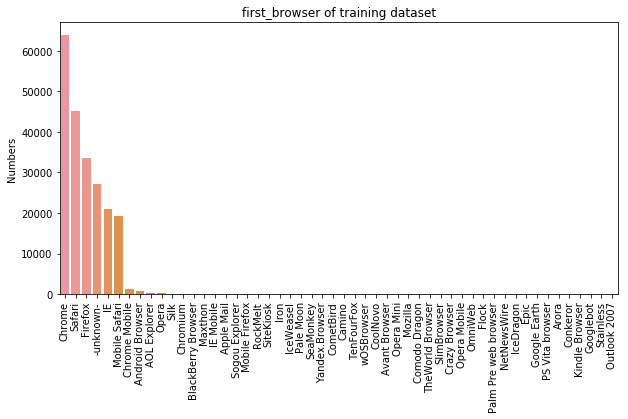

In [22]:
feature_barplot('first_browser')

### 1.3数据分析——session文件
我们先将session文件导入，查看前面10行数据

In [23]:
df_sessions = pd.read_csv('./Data/sessions.csv')
df_sessions.head(10)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
5,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,7703.0
6,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,115.0
7,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,831.0
8,d1mm9tcy42,index,view,view_search_results,Windows Desktop,20842.0
9,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,683.0


#### 1.3.1关联id
在这里我们可以发现一共有6个特征，且user_id与train中的id是关联的。因此我们首先考虑的操作是将user_id改名为id

----

**用到的方法**
**DataFrame.drop(labels=None,axis=0, index=None, columns=None, inplace=False)**

**axis=0，指删除index，因此删除columns时要指定axis=1**

In [24]:
#在数据集最后创建一列——id。将user_id的值按照位置复制到id中。
df_sessions['id'] = df_sessions['user_id']
#删除user_id这一列。
df_sessions = df_sessions.drop(['user_id'],axis = 1)

然后我们查看sessions中的缺失值，我们可以看到action，action_type，action_detail， secs_elapsed缺失值较多。
而为了后续统计方便，我们将这几个特征进行缺失值填充。

In [25]:
df_sessions.isnull().sum()
df_sessions.action = df_sessions.action.fillna('NAN')
df_sessions.action_type = df_sessions.action_type.fillna('NAN')
df_sessions.action_detail = df_sessions.action_detail.fillna('NAN')
df_sessions.isnull().sum()

action                0
action_type           0
action_detail         0
device_type           0
secs_elapsed     136031
id                34496
dtype: int64

### 1.4特征提取
在对数据大致了解之后，我们开始进行特征提取。

#### 1.4.1对sessions文件特征提取

----

**使用到的方法**
**（1）action**
首先我们将action特征的相关信息查看统计一下,但是因为数据过多，我们只显示前10行。
为了有个大致的估计我们同事也看看action最小值。发现为1.

In [26]:
df_sessions.action.value_counts().head(10)
# df_sessions.action.value_counts().min()

show                     2768278
index                     843699
search_results            725226
personalize               706824
search                    536057
ajax_refresh_subtotal     487744
update                    365130
similar_listings          364624
social_connections        339000
reviews                   320591
Name: action, dtype: int64

根据上面的统计我们可以看到,action具有多种,且最少发生次数只有1,那么我们可以尝试将用户发生次数较少的行为action归为other一类.

----

**1、zip()**
**zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表。**

**如果各个迭代器的元素个数不一致，则返回列表长度与最短的对象相同，利用 * 号操作符，可以将元组解压为列表。**

**2、np.unique(ar, return_index=False, return_inverse=False, return_counts=False,axis=None)**






In [27]:
#将较低次数的action值归类为‘other’
act_freq = 100
act = dict(zip(*np.unique(df_sessions.action,return_counts = True)))
df_sessions.action = df_sessions.action.apply(lambda x: 'OTHER' if act[x] < act_freq else x)
#np.unique(df_sessions.action,return_counts=True)

在处理完成action的数据分类之后，接下来对action_detail，action_type，device_type，secs_elapsed进行细化。
—首先将用户的特征根据用户id进行分组。
- 特征action：统计每个用户总的action出现的次数，各个action类型的数量，平均值以及标准差 
- 特征action_detail：统计每个用户总的action_detail出现的次数，各个action_detail类型的数量，平均值以及标准差 
- 特征action_type：统计每个用户总的action_type出现的次数，各个action_type类型的数量，平均值，标准差以及总的停留时长（进行log处理） 
- 特征device_type：统计每个用户总的device_type出现的次数，各个device_type类型的数量，平均值以及标准差 
- 特征secs_elapsed：对缺失值用0填充，统计每个用户secs_elapsed时间的总和，平均值，标准差以及中位数（进行log处理），（总和/平均数），secs_elapsed（log处理后）各个时间出现的次数

In [ ]:
#对action特征进行细化
f_act = df_sessions.action.value_counts().argsort()
f_act_detail = df_sessions.action_detail.value_counts().argsort()
f_act_type = df_sessions.action_type.value_counts().argsort()
f_dev_type = df_sessions.device_type.value_counts().argsort()

#按照id进行分组
dgr_sess = df_sessions.groupby(['id'])
#Loop on dgr_sess to create all the features.
samples = [] #samples列表
ln = len(dgr_sess) #计算分组后df_sessions的长度

for g in dgr_sess:  #对dgr_sess中每个id的数据进行遍历
    gr = g[1]   #data frame that comtains all the data for a groupby value 'zzywmcn0jv'

    l = []  #建一个空列表，临时存放特征

    #the id    for example:'zzywmcn0jv'
    l.append(g[0]) #将id值放入空列表中

    # number of total actions
    l.append(len(gr))#将id对应数据的长度放入列表

    #secs_elapsed 特征中的缺失值用0填充再获取具体的停留时长值
    sev = gr.secs_elapsed.fillna(0).values   #These values are used later.

    #action features 特征-用户行为 
    #每个用户行为出现的次数，各个行为类型的数量，平均值以及标准差
    c_act = [0] * len(f_act)
    for i,v in enumerate(gr.action.values): #i是从0-1对应的位置，v 是用户行为特征的值
        c_act[f_act[v]] += 1
    _, c_act_uqc = np.unique(gr.action.values, return_counts=True)
    #计算用户行为行为特征各个类型数量的长度，平均值以及标准差
    c_act += [len(c_act_uqc), np.mean(c_act_uqc), np.std(c_act_uqc)]
    l = l + c_act

    #action_detail features 特征-用户行为具体
    #(how many times each value occurs, numb of unique values, mean and std)
    c_act_detail = [0] * len(f_act_detail)
    for i,v in enumerate(gr.action_detail.values):
        c_act_detail[f_act_detail[v]] += 1
    _, c_act_det_uqc = np.unique(gr.action_detail.values, return_counts=True)
    c_act_detail += [len(c_act_det_uqc), np.mean(c_act_det_uqc), np.std(c_act_det_uqc)]
    l = l + c_act_detail

    #action_type features  特征-用户行为类型 click等
    #(how many times each value occurs, numb of unique values, mean and std
    #+ log of the sum of secs_elapsed for each value)
    l_act_type = [0] * len(f_act_type)
    c_act_type = [0] * len(f_act_type)
    for i,v in enumerate(gr.action_type.values):
        l_act_type[f_act_type[v]] += sev[i] #sev = gr.secs_elapsed.fillna(0).values ，求每个行为类型总的停留时长
        c_act_type[f_act_type[v]] += 1  
    l_act_type = np.log(1 + np.array(l_act_type)).tolist() #每个行为类型总的停留时长，差异比较大，进行log处理
    _, c_act_type_uqc = np.unique(gr.action_type.values, return_counts=True)
    c_act_type += [len(c_act_type_uqc), np.mean(c_act_type_uqc), np.std(c_act_type_uqc)]
    l = l + c_act_type + l_act_type    

    #device_type features 特征-设备类型
    #(how many times each value occurs, numb of unique values, mean and std)
    c_dev_type  = [0] * len(f_dev_type)
    for i,v in enumerate(gr.device_type .values):
        c_dev_type[f_dev_type[v]] += 1 
    c_dev_type.append(len(np.unique(gr.device_type.values))) 
    _, c_dev_type_uqc = np.unique(gr.device_type.values, return_counts=True)
    c_dev_type += [len(c_dev_type_uqc), np.mean(c_dev_type_uqc), np.std(c_dev_type_uqc)]        
    l = l + c_dev_type    

    #secs_elapsed features  特征-停留时长     
    l_secs = [0] * 5 
    l_log = [0] * 15
    if len(sev) > 0:
        #Simple statistics about the secs_elapsed values.
        l_secs[0] = np.log(1 + np.sum(sev))
        l_secs[1] = np.log(1 + np.mean(sev)) 
        l_secs[2] = np.log(1 + np.std(sev))
        l_secs[3] = np.log(1 + np.median(sev))
        l_secs[4] = l_secs[0] / float(l[1]) #

        #Values are grouped in 15 intervals. Compute the number of values
        #in each interval.
        #sev = gr.secs_elapsed.fillna(0).values 
        log_sev = np.log(1 + sev).astype(int)
        #np.bincount():Count number of occurrences of each value in array of non-negative ints.  
        l_log = np.bincount(log_sev, minlength=15).tolist()                    
    l = l + l_secs + l_log

    #The list l has the feature values of one sample.
    samples.append(l)

#preparing objects    
samples = np.array(samples) 
samp_ar = samples[:, 1:].astype(np.float16) #取除id外的特征数据
samp_id = samples[:, 0]   #取id，id位于第一列

#为提取的特征创建一个dataframe     
col_names = []    #name of the columns
for i in range(len(samples[0])-1):  #减1的原因是因为有个id
    col_names.append('c_' + str(i))  #起名字的方式    
df_agg_sess = pd.DataFrame(samp_ar, columns=col_names)
df_agg_sess['id'] = samp_id
df_agg_sess.index = df_agg_sess.id #将id作为index

In [ ]:
df_agg_sess.head()

分析：经过特征提取后，session文件由6个特征变为458个特征
#### 1.4.2 对trian和test文件进行特征提取
**标记train文件的行数和存储我们进行预测的目标变量**
- labels存储了我们进行预测的目标变量country_destination

In [ ]:
train = pd.read_csv("./Data/train_users_2.csv")
test = pd.read_csv("./Data/test_users.csv")
#计算出train的行数，便于之后对train和test数据进行分离操作
train_row = train.shape[0]  

# The label we need to predict
labels = train['country_destination'].values

**删除date_first_booking和train文件中的country_destination**
- 数据探索时我们发现date_first_booking在train和test文件中缺失值太多，故删除 
- 删除country_destination，用模型预测country_destination，再与已经存储country_destination的labels进行比较，从而判断模型优劣

In [35]:
train.drop(['country_destination', 'date_first_booking'], axis = 1, inplace = True)
test.drop(['date_first_booking'], axis = 1, inplace = True)

合并train和test文件 
- 便于进行相同的特征提取操作

In [36]:
#连接test 和 train
df = pd.concat([train, test], axis = 0, ignore_index = True)

**1.timestamp_first_active**

1.1转换为datetime类型

In [37]:
tfa = df.timestamp_first_active.astype(str).apply(lambda x: datetime.datetime(int(x[:4]),
                                                                          int(x[4:6]), 
                                                                          int(x[6:8]),
                                                                          int(x[8:10]),
                                                                          int(x[10:12]),
                                                                          int(x[12:])))

1.2 提取特征：年，月，日

In [38]:
# create tfa_year, tfa_month, tfa_day feature
df['tfa_year'] = np.array([x.year for x in tfa])
df['tfa_month'] = np.array([x.month for x in tfa])
df['tfa_day'] = np.array([x.day for x in tfa])

1.3 提取特征：weekday 
- 对结果进行one hot encoding编码

In [39]:
#isoweekday() 可以返回一周的星期几，e.g.星期日：0；星期一：1
df['tfa_wd'] = np.array([x.isoweekday() for x in tfa]) 
df_tfa_wd = pd.get_dummies(df.tfa_wd, prefix = 'tfa_wd')  # one hot encoding 
df = pd.concat((df, df_tfa_wd), axis = 1) #添加df['tfa_wd'] 编码后的特征
df.drop(['tfa_wd'], axis = 1, inplace = True)#删除原有未编码的特征

1.4 提取特征：季节 
- 因为判断季节关注的是月份，故对年份进行统一

In [55]:
Y = 2000
seasons = [(0, (date(Y,  1,  1),  date(Y,  3, 20))),  #'winter'
           (1, (date(Y,  3, 21),  date(Y,  6, 20))),  #'spring'
           (2, (date(Y,  6, 21),  date(Y,  9, 22))),  #'summer'
           (3, (date(Y,  9, 23),  date(Y, 12, 20))),  #'autumn'
           (0, (date(Y, 12, 21),  date(Y, 12, 31)))]  #'winter'

def get_season(dt):
    dt = dt.date() #获取日期
    dt = dt.replace(year=Y) #将年统一换成2000年
    return next(season for season, (start, end) in seasons if start <= dt <= end)

df['tfa_season'] = np.array([get_season(x) for x in tfa])
df_tfa_season = pd.get_dummies(df.tfa_season, prefix = 'tfa_season') # one hot encoding 
df = pd.concat((df, df_tfa_season), axis = 1)
df.drop(['tfa_season'], axis = 1, inplace = True)

**2. date_account_created**

2.1 将date_account_created转换为datetime类型

In [56]:
dac = pd.to_datetime(df.date_account_created)

2.2 提取特征：年，月，日

In [57]:
# create year, month, day feature for dac
df['dac_year'] = np.array([x.year for x in dac])
df['dac_month'] = np.array([x.month for x in dac])
df['dac_day'] = np.array([x.day for x in dac])

2.3 提取特征：weekday

In [58]:
# create features of weekday for dac

df['dac_wd'] = np.array([x.isoweekday() for x in dac])
df_dac_wd = pd.get_dummies(df.dac_wd, prefix = 'dac_wd')
df = pd.concat((df, df_dac_wd), axis = 1)
df.drop(['dac_wd'], axis = 1, inplace = True)

2.4 提取特征：季节

In [59]:
# create season features fro dac
df['dac_season'] = np.array([get_season(x) for x in dac])
df_dac_season = pd.get_dummies(df.dac_season, prefix = 'dac_season')
df = pd.concat((df, df_dac_season), axis = 1)
df.drop(['dac_season'], axis = 1, inplace = True)

2.5提取特征：date_account_created和timestamp_first_active之间的差值 
- 即用户在airbnb平台活跃到正式注册所花的时间

In [60]:
dt_span = dac.subtract(tfa).dt.days 

In [61]:
dt_span.value_counts().head(10)

-1     275369
 0          7
 6          4
 5          4
 1          4
 2          3
 3          3
 4          3
 28         3
 94         2
dtype: int64

分析：数据主要集中在-1，可以猜测，用户当天注册dt_span值便是-1 
- 从差值提取特征：差值为一天，一月，一年和其他 
- 即用户活跃到注册花费的时间为一天，一月，一年或其他


In [62]:
# create categorical feature: span = -1; -1 < span < 30; 31 < span < 365; span > 365
def get_span(dt):
    # dt is an integer
    if dt == -1:
        return 'OneDay'
    elif (dt < 30) & (dt > -1):
        return 'OneMonth'
    elif (dt >= 30) & (dt <= 365):
        return 'OneYear'
    else:
        return 'other'

df['dt_span'] = np.array([get_span(x) for x in dt_span])
df_dt_span = pd.get_dummies(df.dt_span, prefix = 'dt_span')
df = pd.concat((df, df_dt_span), axis = 1)
df.drop(['dt_span'], axis = 1, inplace = True)

2.6 删除原有的特征 
- 对timestamp_first_active，date_account_created进行特征提取后，从特征列表中删除原有的特征

In [63]:
df.drop(['date_account_created','timestamp_first_active'], axis = 1, inplace = True)

**3. age**

In [64]:
#Age 获取年龄
av = df.age.values

在数据探索阶段，我们发现大部分数据是集中在（15，90）区间的，但有部分年龄分布在（1900，2000）区间，我们猜测用户是把出生日期误填为年龄，故进行预处理

In [ ]:
#数据来自2014年，故用2014-value
av = np.where(np.logical_and(av<2000, av>1900), 2014-av, av) 
df['age'] = av

In [ ]:
# Age has many abnormal values that we need to deal with. 
age = df.age
age.fillna(-1, inplace = True) #空值填充为-1
div = 15
def get_age(age):
    # age is a float number  将连续型转换为离散型
    if age < 0:
        return 'NA' #表示是空值
    elif (age < div):
        return div #如果年龄小于15岁，那么返回15岁
    elif (age <= div * 2):
        return div*2 #如果年龄大于15小于等于30岁，则返回30岁
    elif (age <= div * 3):
        return div * 3
    elif (age <= div * 4):
        return div * 4
    elif (age <= div * 5):
        return div * 5
    elif (age <= 110):
        return div * 6
    else:
        return 'Unphysical' #非正常年龄

In [ ]:
df['age'] = np.array([get_age(x) for x in age])
df_age = pd.get_dummies(df.age, prefix = 'age')
df = pd.concat((df, df_age), axis = 1)
df.drop(['age'], axis = 1, inplace = True)

4. 其他特征 

    - 在数据探索时，我们发现剩余的特征lables都比较少，故不进一步进行特征提取，只进行one-hot-encoding处理

In [ ]:
feat_toOHE = ['gender', 
             'signup_method', 
             'signup_flow', 
             'language', 
             'affiliate_channel', 
             'affiliate_provider', 
             'first_affiliate_tracked', 
             'signup_app', 
             'first_device_type', 
             'first_browser']
#对其他特征进行one-hot-encoding处理
for f in feat_toOHE:
    df_ohe = pd.get_dummies(df[f], prefix=f, dummy_na=True)
    df.drop([f], axis = 1, inplace = True)
    df = pd.concat((df, df_ohe), axis = 1)

1.4.3 整合提取的所有特征

我们将对session以及train，test文件中提取的特征进行合并

In [ ]:
#将对session提取的特征整合到一起
df_all = pd.merge(df, df_agg_sess, how='left')
df_all = df_all.drop(['id'], axis=1) #删除id
df_all = df_all.fillna(-2)  #对没有sesssion data的特征进行缺失值处理

#加了一列，表示每一行总共有多少空值，这也作为一个特征
df_all['all_null'] = np.array([sum(r<0) for r in df_all.values]) 

#### 2.模型构建
##### 2.1 数据准备
2.1.1. 将train和test数据进行分离操作 
- train_row是之前记录的train数据行数
- 将提取的特征生成csv文件，并读取

In [ ]:
Xtrain = df_all.iloc[:train_row, :]
Xtest = df_all.iloc[train_row:, :]
Xtrain.to_csv("Airbnb_xtrain_v2.csv")
Xtest.to_csv("Airbnb_xtest_v2.csv")
#labels.tofile（）：Write array to a file as text or binary (default)
labels.tofile("Airbnb_ytrain_v2.csv", sep='\n', format='%s') #存放目标变量
xtrain = pd.read_csv("Airbnb_xtrain_v2.csv",index_col=0)
ytrain = pd.read_csv("Airbnb_ytrain_v2.csv", header=None)
xtrain.head()
ytrain.head()

分析：可以发现经过特征提取后特征文件xtrain扩展为665个特征，ytrain中包含训练集中的目标变量 

2.1.2 将目标变量进行labels encoding

In [ ]:
le = LabelEncoder()
ytrain_le = le.fit_transform(ytrain.values)

2.1.3 提取10%的数据进行模型训练 
- 减少训练模型花费的时间

In [ ]:
# Let us take 10% of the data for faster training. 
n = int(xtrain.shape[0]*0.1)
xtrain_new = xtrain.iloc[:n, :]  #训练数据
ytrain_new = ytrain_le[:n]       #训练数据的目标变量
X_scaler = StandardScaler()
xtrain_new = X_scaler.fit_transform(xtrain_new)

**2.2 评分模型：NDCG**
- NDCG是一种衡量排序质量的评价指标，该指标考虑了所有元素的相关性
- 由于我们预测的目标变量并不是二分类变量，故我们用NDGG模型来进行模型评分，判断模型优劣
- 一般二分类变量: 我们习惯于使用 f1 score, precision, recall, auc score来进行模型评分

In [ ]:
from sklearn.metrics import make_scorer

def dcg_score(y_true, y_score, k=5):

    """
    y_true : array, shape = [n_samples] #数据
        Ground truth (true relevance labels).
    y_score : array, shape = [n_samples, n_classes] #预测的分数
        Predicted scores.
    k : int
    """
    order = np.argsort(y_score)[::-1] #分数从高到低排序
    y_true = np.take(y_true, order[:k]) #取出前k[0,k）个分数

    gain = 2 ** y_true - 1   

    discounts = np.log2(np.arange(len(y_true)) + 2)
    return np.sum(gain / discounts)


def ndcg_score(ground_truth, predictions, k=5):   

    """
    Parameters
    ----------
    ground_truth : array, shape = [n_samples]
        Ground truth (true labels represended as integers).
    predictions : array, shape = [n_samples, n_classes] 
        Predicted probabilities. 预测的概率
    k : int
        Rank.
    """
    lb = LabelBinarizer()
    lb.fit(range(len(predictions) + 1))
    T = lb.transform(ground_truth)    
    scores = []
    # Iterate over each y_true and compute the DCG score
    for y_true, y_score in zip(T, predictions):
        actual = dcg_score(y_true, y_score, k)
        best = dcg_score(y_true, y_true, k)
        score = float(actual) / float(best)
        scores.append(score)

    return np.mean(scores)

#### 3构建模型
##### 3.1 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
lr = LogisticRegression(C = 1.0, penalty='l2', multi_class='ovr')
RANDOM_STATE = 2017  #随机种子

#k-fold cross validation（k-折叠交叉验证）
kf = KFold(n_splits=5, random_state=RANDOM_STATE) #分成5个组
train_score = [] 
cv_score = []

# select a k  (value how many y):
k_ndcg = 3 
# kf.split: Generate indices to split data into training and test set.
for train_index, test_index in kf.split(xtrain_new, ytrain_new):
    #训练集数据分割为训练集和测试集，y是目标变量
    X_train, X_test = xtrain_new[train_index, :], xtrain_new[test_index, :]
    y_train, y_test = ytrain_new[train_index], ytrain_new[test_index]

    lr.fit(X_train, y_train)

    y_pred = lr.predict_proba(X_test)
    train_ndcg_score = ndcg_score(y_train, lr.predict_proba(X_train), k = k_ndcg)
    cv_ndcg_score = ndcg_score(y_test, y_pred, k=k_ndcg)

    train_score.append(train_ndcg_score)
    cv_score.append(cv_ndcg_score)

print ("\nThe training score is: {}".format(np.mean(train_score)))
print ("\nThe cv score is: {}".format(np.mean(cv_score)))

In [ ]:
改变逻辑回归参数iteration

In [ ]:
# set the iterations
iteration = [1,5,10,15,20, 50, 100]

kf = KFold(n_splits=3, random_state=RANDOM_STATE)

train_score = []
cv_score = []

# select a k:
k_ndcg = 5

for i, item in enumerate(iteration): 

    lr = LogisticRegression(C=1.0, max_iter=item, tol=1e-5, solver='newton-cg', multi_class='ovr') 
    train_score_iter = []
    cv_score_iter = []

    for train_index, test_index in kf.split(xtrain_new, ytrain_new):
        X_train, X_test = xtrain_new[train_index, :], xtrain_new[test_index, :]
        y_train, y_test = ytrain_new[train_index], ytrain_new[test_index]

        lr.fit(X_train, y_train)

        y_pred = lr.predict_proba(X_test)
        train_ndcg_score = ndcg_score(y_train, lr.predict_proba(X_train), k = k_ndcg)
        cv_ndcg_score = ndcg_score(y_test, y_pred, k=k_ndcg)


        train_score_iter.append(train_ndcg_score)
        cv_score_iter.append(cv_ndcg_score)

    train_score.append(np.mean(train_score_iter))
    cv_score.append(np.mean(cv_score_iter))

ymin = np.min(cv_score)-0.05
ymax = np.max(train_score)+0.05

plt.figure(figsize=(9,4))
plt.plot(iteration, train_score, 'ro-', label = 'training')
plt.plot(iteration, cv_score, 'b*-', label = 'Cross-validation')
plt.xlabel("iterations")
plt.ylabel("Score")
plt.xlim(-5, np.max(iteration)+10)
plt.ylim(ymin, ymax)
plt.plot(np.linspace(20,20,50), np.linspace(ymin, ymax, 50), 'g--')
plt.legend(loc = 'lower right', fontsize = 12)
plt.title("Score vs iteration learning curve")

plt.tight_layout()

In [ ]:
改变数据量大小

In [ ]:
# Chaning the sampling size
# set the iter to the best iteration: iter = 20

perc = [0.01,0.02,0.05,0.1,0.2,0.5,1]

kf = KFold(n_splits=3, random_state=RANDOM_STATE)

train_score = []
cv_score = []

# select a k:
k_ndcg = 5

for i, item in enumerate(perc):

    lr = LogisticRegression(C=1.0, max_iter=20, tol=1e-6, solver='newton-cg', multi_class='ovr')
    train_score_iter = []
    cv_score_iter = []

    n = int(xtrain_new.shape[0]*item)
    xtrain_perc = xtrain_new[:n, :]
    ytrain_perc = ytrain_new[:n]


    for train_index, test_index in kf.split(xtrain_perc, ytrain_perc):

        X_train, X_test = xtrain_perc[train_index, :], xtrain_perc[test_index, :]
        y_train, y_test = ytrain_perc[train_index], ytrain_perc[test_index]

        print(X_train.shape, X_test.shape)

        lr.fit(X_train, y_train)

        y_pred = lr.predict_proba(X_test)
        train_ndcg_score = ndcg_score(y_train, lr.predict_proba(X_train), k = k_ndcg)
        cv_ndcg_score = ndcg_score(y_test, y_pred, k=k_ndcg)

        train_score_iter.append(train_ndcg_score)
        cv_score_iter.append(cv_ndcg_score)

    train_score.append(np.mean(train_score_iter))
    cv_score.append(np.mean(cv_score_iter))
    
    ymin = np.min(cv_score)-0.1
ymax = np.max(train_score)+0.1

plt.figure(figsize=(9,4))
plt.plot(np.array(perc)*100, train_score, 'ro-', label = 'training')
plt.plot(np.array(perc)*100, cv_score, 'bo-', label = 'Cross-validation')
plt.xlabel("Sample size (unit %)")
plt.ylabel("Score")
plt.xlim(-5, np.max(perc)*100+10)
plt.ylim(ymin, ymax)

plt.legend(loc = 'lower right', fontsize = 12)
plt.title("Score vs sample size learning curve")

plt.tight_layout()

In [ ]:
分析：随着数据量的增加，逻辑回归模型对测试集的预测评分

（蓝色线）在不断上升，因为我们在训练模型时只用了10%的数据，如果使用全部的数据，效果可能会更好

#### 3.2 树模型

其中的模型包括DecisionTree，RandomForest，AdaBoost，Bagging，ExtraTree，GraBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import *
from sklearn.svm import SVC, LinearSVC, NuSVC
LEARNING_RATE = 0.1
N_ESTIMATORS = 50
RANDOM_STATE = 2017
MAX_DEPTH = 9

#建了一个tree字典
clf_tree ={
    'DTree': DecisionTreeClassifier(max_depth=MAX_DEPTH,
                                    random_state=RANDOM_STATE),

    'RF': RandomForestClassifier(n_estimators=N_ESTIMATORS,
                                 max_depth=MAX_DEPTH,
                                 random_state=RANDOM_STATE),

    'AdaBoost': AdaBoostClassifier(n_estimators=N_ESTIMATORS,
                                   learning_rate=LEARNING_RATE,
                                   random_state=RANDOM_STATE),

    'Bagging': BaggingClassifier(n_estimators=N_ESTIMATORS,
                                 random_state=RANDOM_STATE),

    'ExtraTree': ExtraTreesClassifier(max_depth=MAX_DEPTH,
                                      n_estimators=N_ESTIMATORS,
                                      random_state=RANDOM_STATE),

    'GraBoost': GradientBoostingClassifier(learning_rate=LEARNING_RATE,
                                           max_depth=MAX_DEPTH,
                                           n_estimators=N_ESTIMATORS,
                                           random_state=RANDOM_STATE)
}
train_score = []
cv_score = []

kf = KFold(n_splits=3, random_state=RANDOM_STATE)

k_ndcg = 5

for key in clf_tree.keys():

    clf = clf_tree.get(key)

    train_score_iter = []
    cv_score_iter = []

    for train_index, test_index in kf.split(xtrain_new, ytrain_new):

        X_train, X_test = xtrain_new[train_index, :], xtrain_new[test_index, :]
        y_train, y_test = ytrain_new[train_index], ytrain_new[test_index]

        clf.fit(X_train, y_train)

        y_pred = clf.predict_proba(X_test)
        train_ndcg_score = ndcg_score(y_train, clf.predict_proba(X_train), k = k_ndcg)
        cv_ndcg_score = ndcg_score(y_test, y_pred, k=k_ndcg)

        train_score_iter.append(train_ndcg_score)
        cv_score_iter.append(cv_ndcg_score)

    train_score.append(np.mean(train_score_iter))
    cv_score.append(np.mean(cv_score_iter))


In [ ]:
train_score_tree = train_score
cv_score_tree = cv_score

ymin = np.min(cv_score)-0.05
ymax = np.max(train_score)+0.05

x_ticks = clf_tree.keys()

plt.figure(figsize=(8,5))
plt.plot(range(len(x_ticks)), train_score_tree, 'ro-', label = 'training')
plt.plot(range(len(x_ticks)),cv_score_tree, 'bo-', label = 'Cross-validation')

plt.xticks(range(len(x_ticks)),x_ticks,rotation = 45, fontsize = 10)
plt.xlabel("Tree method", fontsize = 12)
plt.ylabel("Score", fontsize = 12)
plt.xlim(-0.5, 5.5)
plt.ylim(ymin, ymax)

plt.legend(loc = 'best', fontsize = 12)
plt.title("Different tree methods")

plt.tight_layout()

#### 3.3 SVM模型
根据核函数的不同，又分为：SVM-rbf，SVM-poly，SVM-linear等

In [ ]:
TOL = 1e-4
MAX_ITER = 1000

clf_svm = {

    'SVM-rbf': SVC(kernel='rbf',
                   max_iter=MAX_ITER,
                   tol=TOL, random_state=RANDOM_STATE,
                   decision_function_shape='ovr'),     

    'SVM-poly': SVC(kernel='poly',
                   max_iter=MAX_ITER,
                   tol=TOL, random_state=RANDOM_STATE,
                   decision_function_shape='ovr'),     

    'SVM-linear': SVC(kernel='linear',
                      max_iter=MAX_ITER,
                      tol=TOL, 
                      random_state=RANDOM_STATE,
                      decision_function_shape='ovr'),  

    'LinearSVC': LinearSVC(max_iter=MAX_ITER,
                            tol=TOL,
                            random_state=RANDOM_STATE,
                            multi_class = 'ovr')       

train_score_svm = []
cv_score_svm = []

kf = KFold(n_splits=3, random_state=RANDOM_STATE)

k_ndcg = 5

for key in clf_svm.keys():

    clf = clf_svm.get(key)

    train_score_iter = []
    cv_score_iter = []

    for train_index, test_index in kf.split(xtrain_new, ytrain_new):

        X_train, X_test = xtrain_new[train_index, :], xtrain_new[test_index, :]
        y_train, y_test = ytrain_new[train_index], ytrain_new[test_index]

        clf.fit(X_train, y_train)

        y_pred = clf.decision_function(X_test)
        train_ndcg_score = ndcg_score(y_train, clf.decision_function(X_train), k = k_ndcg)
        cv_ndcg_score = ndcg_score(y_test, y_pred, k=k_ndcg)

        train_score_iter.append(train_ndcg_score)
        cv_score_iter.append(cv_ndcg_score)

    train_score_svm.append(np.mean(train_score_iter))
    cv_score_svm.append(np.mean(cv_score_iter))
}

In [ ]:
ymin = np.min(cv_score_svm)-0.05
ymax = np.max(train_score_svm)+0.05

x_ticks = clf_svm.keys()

plt.figure(figsize=(8,5))
plt.plot(range(len(x_ticks)), train_score_svm, 'ro-', label = 'training')
plt.plot(range(len(x_ticks)),cv_score_svm, 'bo-', label = 'Cross-validation')

plt.xticks(range(len(x_ticks)),x_ticks,rotation = 45, fontsize = 10)
plt.xlabel("Tree method", fontsize = 12)
plt.ylabel("Score", fontsize = 12)
plt.xlim(-0.5, 3.5)
plt.ylim(ymin, ymax)

plt.legend(loc = 'best', fontsize = 12)
plt.title("Different SVM methods")

plt.tight_layout()

#### 3.4xgboost

In [ ]:
import xgboost as xgb

def customized_eval(preds, dtrain):
    labels = dtrain.get_label()
    top = []
    for i in range(preds.shape[0]):
        top.append(np.argsort(preds[i])[::-1][:5])
    mat = np.reshape(np.repeat(labels,np.shape(top)[1]) == np.array(top).ravel(),np.array(top).shape).astype(int)
    score = np.mean(np.sum(mat/np.log2(np.arange(2, mat.shape[1] + 2)),axis = 1))
    return 'ndcg5', score
# xgboost parameters

NUM_XGB = 200

params = {}
params['colsample_bytree'] = 0.6
params['max_depth'] = 6
params['subsample'] = 0.8
params['eta'] = 0.3
params['seed'] = RANDOM_STATE
params['num_class'] = 12
params['objective'] = 'multi:softprob'   # output the probability instead of class. 
train_score_iter = []
cv_score_iter = []

kf = KFold(n_splits = 3, random_state=RANDOM_STATE)

k_ndcg = 5

for train_index, test_index in kf.split(xtrain_new, ytrain_new):

    X_train, X_test = xtrain_new[train_index, :], xtrain_new[test_index, :]
    y_train, y_test = ytrain_new[train_index], ytrain_new[test_index]

    train_xgb = xgb.DMatrix(X_train, label= y_train)
    test_xgb = xgb.DMatrix(X_test, label = y_test)

    watchlist = [ (train_xgb,'train'), (test_xgb, 'test') ]

    bst = xgb.train(params, 
                     train_xgb,
                     NUM_XGB,
                     watchlist,
                     feval = customized_eval,
                     verbose_eval = 3,
                     early_stopping_rounds = 5)


    #bst = xgb.train( params, dtrain, num_round, evallist )

    y_pred = np.array(bst.predict(test_xgb))
    y_pred_train = np.array(bst.predict(train_xgb))
    train_ndcg_score = ndcg_score(y_train, y_pred_train , k = k_ndcg)
    cv_ndcg_score = ndcg_score(y_test, y_pred, k=k_ndcg)

    train_score_iter.append(train_ndcg_score)
    cv_score_iter.append(cv_ndcg_score)

train_score_xgb = np.mean(train_score_iter)
cv_score_xgb = np.mean(cv_score_iter)

print ("\nThe training score is: {}".format(train_score_xgb))
print ("The cv score is: {}\n".format(cv_score_xgb))

#### 3.5 模型比较

In [ ]:
model_cvscore = np.hstack((cv_score_lr, cv_score_tree, cv_score_svm, cv_score_xgb))
model_name = np.array(['LinearReg','ExtraTree','DTree','RF','GraBoost','Bagging','AdaBoost','LinearSVC','SVM-linear','SVM-rbf','SVM-poly','Xgboost'])
fig = plt.figure(figsize=(8,4))

sns.barplot(model_cvscore, model_name, palette="Blues_d")

plt.xticks(rotation=0, size = 10)
plt.xlabel("CV score", fontsize = 12)
plt.ylabel("Model", fontsize = 12)
plt.title("Cross-validation score for different models")

plt.tight_layout()

### 4小结
- 对数据的理解和探索很重要
- 可以通过特征工程，进一步提取特征
- 模型评估的方法有很多种，选取适宜的模型评估方法
- 目前只用了10%的数据进行模型训练，用全部的数据集进行训练，效果可能会更好
- 需要深入学习模型算法，学会调参